# Energy Consumption Forecasting with PyCaret


## Installing Pycaret

In [1]:
!pip install pandas numpy matplotlib seaborn plotly
!pip install statsmodels scikit-learn
!pip install pycaret

##Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# PyCaret
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from pycaret.time_series import *
from pycaret.regression import *


## Load Dataset

##Data Processing

In [3]:
df = pd.read_csv("PDB_Load_History.csv", index_col=0)
df.head()


,demand
data,
8/18/2013,13326.50000
8/19/2013,15461.25000
8/20/2013,16720.20833
8/21/2013,17532.33333
8/22/2013,17459.91667


In [4]:
pd.to_datetime(df.index)

DatetimeIndex(['2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
               '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
               '2013-08-26', '2013-08-27',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='data', length=501, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 8/18/2013 to 12/31/2014
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  501 non-null    float64
dtypes: float64(1)
memory usage: 7.8+ KB


In [6]:
df.index = pd.to_datetime(df.index).to_period('D')
df.index

PeriodIndex(['2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
             '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
             '2013-08-26', '2013-08-27',
             ...
             '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
             '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
             '2014-12-30', '2014-12-31'],
            dtype='period[D]', name='data', length=501)

In [7]:
df = df[['demand']]

##Time Series Plot

Text(0.5, 1.0, 'Demand Time Series')

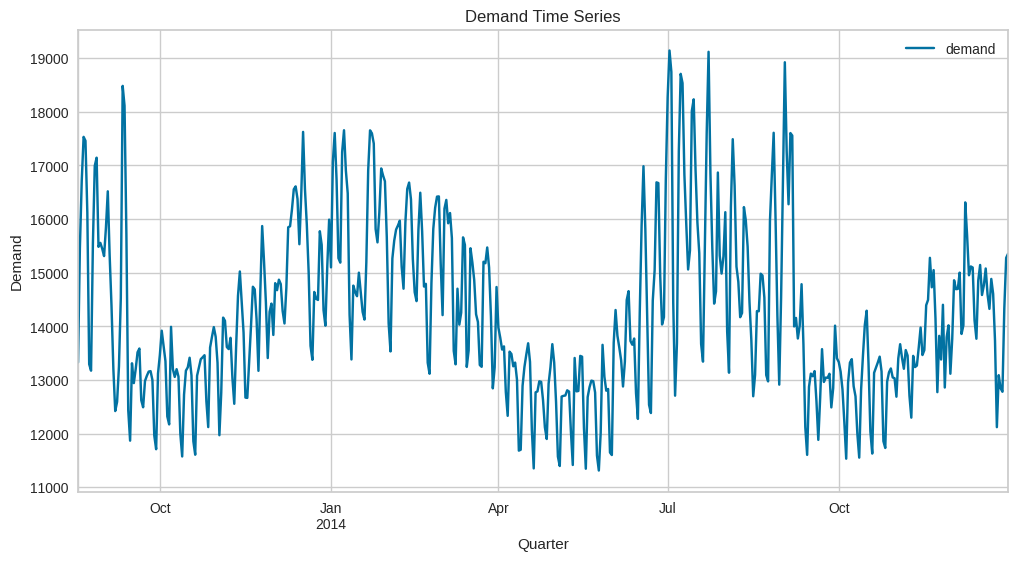

In [8]:
import matplotlib.pyplot as plt

df.plot(figsize=(12,6))
plt.xlabel('Quarter')
plt.ylabel('Demand')
plt.title('Demand Time Series')


Clear trend and seasonality is visible.

## Stationarity Tests
## Augmented Dickey-Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
result = adfuller(df['demand'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.301769
p-value: 0.171398
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


The results of the ADF test indicate that the time series data is likely non-stationary. With an ADF statistic of -2.301769, which is higher than the critical values at the 1%, 5%, and 10% levels, and a p-value of 0.171398, which exceeds the 0.05 threshold, we fail to reject the null hypothesis that the series has a unit root.

## Train Test Split

In [10]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='demand', fh = 24, coverage=0.90)

,Description,Value
0,session_id,4645
1,Target,demand
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(501, 1)"
5,Transformed data shape,"(501, 1)"
6,Transformed train set shape,"(477, 1)"
7,Transformed test set shape,"(24, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [11]:
exp.plot_model(plot='train_test_split')

#Model Development

##Econometrics:

In [12]:
from pycaret.time_series import *

In [13]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='demand', fh = 24, coverage=0.90)

,Description,Value
0,session_id,3113
1,Target,demand
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(501, 1)"
5,Transformed data shape,"(501, 1)"
6,Transformed train set shape,"(477, 1)"
7,Transformed test set shape,"(24, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [14]:
df.index[:-24]

PeriodIndex(['2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
             '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
             '2013-08-26', '2013-08-27',
             ...
             '2014-11-28', '2014-11-29', '2014-11-30', '2014-12-01',
             '2014-12-02', '2014-12-03', '2014-12-04', '2014-12-05',
             '2014-12-06', '2014-12-07'],
            dtype='period[D]', name='data', length=477)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

### SES

In [16]:
ses = exp.create_model('exp_smooth', trend= None, seasonal= None, sp= None, cross_validation=False )

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.0120,0.8345,938.3498,1075.9920,0.0648,0.0657,-0.2200


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
y_pred = ses.predict(df.index[:-24])
y_pred

,demand
data,
2013-08-18,15502.149998
2013-08-19,13337.378250
2013-08-20,15450.630641
2013-08-21,16713.860442
2013-08-22,17528.240966
...,...
2014-12-03,14852.860681
2014-12-04,14693.053053
2014-12-05,14697.187554


In [18]:
y_forecast = ses.predict(df.index[-24:])
y_forecast

,demand
2014-12-08,14017.887303
2014-12-09,14017.887303
2014-12-10,14017.887303
2014-12-11,14017.887303
2014-12-12,14017.887303
2014-12-13,14017.887303
2014-12-14,14017.887303
2014-12-15,14017.887303
2014-12-16,14017.887303
2014-12-17,14017.887303


### Holt Winter's

In [19]:
hw_mult = exp.create_model('exp_smooth', trend='add', seasonal='mul', sp=12, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.2134,1.0437,1125.0509,1345.6195,0.0779,0.0797,-0.9080


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
y_pred = hw_mult.predict(df.index[:-24])
y_pred

,demand
data,
2013-08-18,16915.905787
2013-08-19,13303.625812
2013-08-20,15233.226072
2013-08-21,15669.384436
2013-08-22,17421.435676
...,...
2014-12-03,14381.756320
2014-12-04,14188.511086
2014-12-05,14259.604240


In [21]:
y_forecast = hw_mult.predict(df.index[-24:])
y_forecast

,demand
2014-12-08,14125.323522
2014-12-09,14342.850460
2014-12-10,14764.995443
2014-12-11,14969.540107
2014-12-12,14900.492543
2014-12-13,15149.215384
2014-12-14,15120.547082
2014-12-15,14645.736147
2014-12-16,14163.675320
2014-12-17,13767.876449


### Naive

In [22]:
naive = exp.create_model('naive', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.0116,0.8343,937.9601,1075.6612,0.0648,0.0657,-0.2192


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
y_pred = naive.predict(df.index[:-24])
y_pred

,demand
data,
2013-08-18,13326.50000
2013-08-19,13326.50000
2013-08-20,15461.25000
2013-08-21,16720.20833
2013-08-22,17532.33333
...,...
2014-12-03,14858.33333
2014-12-04,14692.25000
2014-12-05,14697.20833


In [24]:
y_forecast = naive.predict(df.index[-24:])
y_forecast

,demand
data,
2014-12-08,14018.66667
2014-12-09,14018.66667
2014-12-10,14018.66667
2014-12-11,14018.66667
2014-12-12,14018.66667
2014-12-13,14018.66667
2014-12-14,14018.66667
2014-12-15,14018.66667
2014-12-16,14018.66667


### Seasonal Naive

In [25]:
snaive = exp.create_model('snaive', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.8106,0.7994,751.6042,1030.7383,0.0535,0.0529,-0.1195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
y_pred = snaive.predict(df.index[:-24])
y_pred

,demand
data,
2013-08-18,13326.50000
2013-08-19,15461.25000
2013-08-20,16720.20833
2013-08-21,17532.33333
2013-08-22,17459.91667
...,...
2014-12-03,14401.00000
2014-12-04,12858.20833
2014-12-05,13795.66667


In [27]:
y_forecast = snaive.predict(df.index[-24:])
y_forecast

,demand
data,
2014-12-08,13767.04167
2014-12-09,14858.33333
2014-12-10,14692.25000
2014-12-11,14697.20833
2014-12-12,15000.58333
2014-12-13,13857.08333
2014-12-14,14018.66667
2014-12-15,13767.04167
2014-12-16,14858.33333


### ARIMA Model

In [28]:
arima = exp.create_model('arima', order=(1,1,1))  # These are p,d,q parameters for ARIMA which you may need to adjust

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2014-09-26,1.5244,1.3400,1513.0941,1826.1702,0.1207,0.1108,-4.9449
1,2014-10-20,1.1111,0.9341,1064.1928,1242.0403,0.0805,0.0766,-5.2861
2,2014-11-13,1.1365,0.8948,1053.1564,1162.9416,0.0737,0.0770,-1.9604
Mean,NaT,1.2573,1.0563,1210.1477,1410.3840,0.0917,0.0882,-4.0638
SD,NaT,0.1891,0.2013,214.2628,295.7733,0.0207,0.0160,1.4938


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
y_pred = arima.predict(df.index[:-24])
y_pred

,demand
data,
2013-08-18,NaN
2013-08-19,14194.707407
2013-08-20,15318.887584
2013-08-21,16909.063721
2013-08-22,17539.436719
...,...
2014-12-03,16267.989912
2014-12-04,12693.929269
2014-12-05,16208.253524


In [30]:
y_forecast = arima.predict(df.index[-24:])
y_forecast

,demand
data,
2014-12-08,14933.305175
2014-12-09,15945.605345
2014-12-10,15807.129446
2014-12-11,15806.420936
2014-12-12,16114.515478
2014-12-13,14972.492968
2014-12-14,15136.565786
2014-12-15,16053.377882
2014-12-16,17067.950247


### Auto ARIMA

In [31]:
auto_arima = exp.create_model('auto_arima')  # Automatically determines the best p,d,q


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2014-09-26,0.7214,0.6121,716.0453,834.1181,0.0574,0.0553,-0.2403
1,2014-10-20,0.4691,0.3814,449.3228,507.1324,0.0346,0.0341,-0.0480
2,2014-11-13,1.3594,1.0664,1259.7367,1386.0589,0.0886,0.0935,-3.2053
Mean,NaT,0.8500,0.6866,808.3683,909.1031,0.0602,0.0610,-1.1645
SD,NaT,0.3747,0.2846,337.2292,362.7166,0.0221,0.0246,1.4452


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
y_pred = auto_arima.predict(df.index[:-24])
y_pred

,demand
data,
2013-08-18,14682.567465
2013-08-19,13673.057760
2013-08-20,15862.527958
2013-08-21,16263.834503
2013-08-22,16694.410455
...,...
2014-12-03,15489.054968
2014-12-04,13865.746420
2014-12-05,15101.091561


In [33]:
y_forecast = auto_arima.predict(df.index[-24:])
y_forecast

,demand
data,
2014-12-08,14767.404564
2014-12-09,14689.575267
2014-12-10,14815.825013
2014-12-11,14206.834427
2014-12-12,14536.801361
2014-12-13,14208.008585
2014-12-14,13858.622751
2014-12-15,14345.161532
2014-12-16,14614.056474


### Econometrics Model Comparison

In [34]:
exp.compare_models(include=[naive, snaive, ses, hw_mult, arima, auto_arima], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
5,Auto ARIMA,0.7398,0.7001,685.9667,902.6104,0.0491,0.0481,0.1415,61.1500
1,Seasonal Naive Forecaster,0.8106,0.7994,751.6042,1030.7383,0.0535,0.0529,-0.1195,0.0300
0,Naive Forecaster,1.0116,0.8343,937.9601,1075.6612,0.0648,0.0657,-0.2192,0.0200
2,Exponential Smoothing,1.0120,0.8345,938.3498,1075.9920,0.0648,0.0657,-0.2200,0.0400
3,Exponential Smoothing,1.2134,1.0437,1125.0509,1345.6195,0.0779,0.0797,-0.9080,0.1600
4,ARIMA,2.7956,2.3609,2592.1015,3043.9240,0.1854,0.1641,-8.7634,0.2400


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

AutoARIMA(random_state=3113, sp=7, suppress_warnings=True)

In [35]:
exp.plot_model([naive, snaive, ses, hw_mult, arima, auto_arima], plot='insample', data_kwargs={'labels':["Naive", "Seasonal Naive", "SES", "Holt-Winter-Multiplicative", "Arima", "Auto Arima"]})

In [36]:
exp.plot_model([naive, snaive, ses, hw_mult, arima, auto_arima], plot='forecast', data_kwargs={'fh':36, 'labels':["Naive", "Seasonal Naive", "SES", "Holt-Winter-Multiplicative", "Arima", "Auto Arima"]})

## Machine Learning

In [37]:
data = pd.read_csv("PDB_Load_History.csv", index_col=0)
data.head()

,demand
data,
8/18/2013,13326.50000
8/19/2013,15461.25000
8/20/2013,16720.20833
8/21/2013,17532.33333
8/22/2013,17459.91667


In [38]:
pd.to_datetime(data.index)

DatetimeIndex(['2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
               '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
               '2013-08-26', '2013-08-27',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='data', length=501, freq=None)

In [39]:
data.index = pd.to_datetime(data.index).to_period('D')
data.index

PeriodIndex(['2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
             '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
             '2013-08-26', '2013-08-27',
             ...
             '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
             '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
             '2014-12-30', '2014-12-31'],
            dtype='period[D]', name='data', length=501)

In [40]:
data = data[['demand']]

Text(0.5, 1.0, 'Demand Time Series')

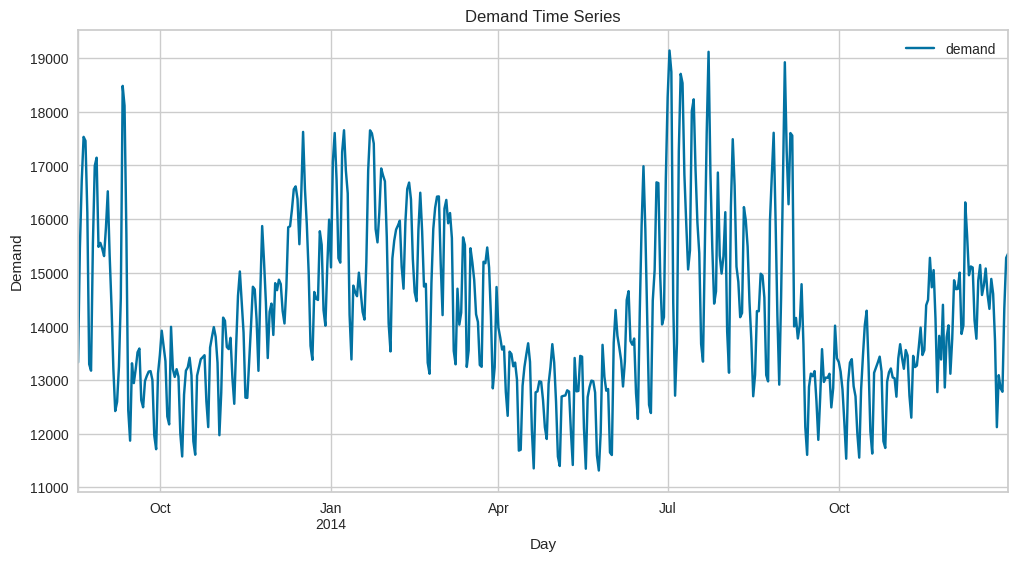

In [41]:
import matplotlib.pyplot as plt

data.plot(figsize=(12,6))
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Demand Time Series')

In [42]:
# Create lag features
data['Lag_1'] = data['demand'].shift(1)
data['Lag_2'] = data['demand'].shift(2)
data['Lag_3'] = data['demand'].shift(3)

data.head()

,demand,Lag_1,Lag_2,Lag_3
data,,,,
2013-08-18,13326.50000,NaN,NaN,NaN
2013-08-19,15461.25000,13326.50000,NaN,NaN
2013-08-20,16720.20833,15461.25000,13326.50000,NaN
2013-08-21,17532.33333,16720.20833,15461.25000,13326.50
2013-08-22,17459.91667,17532.33333,16720.20833,15461.25


In [43]:
# Drop NA values
data.dropna(inplace=True)
data.head()

,demand,Lag_1,Lag_2,Lag_3
data,,,,
2013-08-21,17532.33333,16720.20833,15461.25000,13326.50000
2013-08-22,17459.91667,17532.33333,16720.20833,15461.25000
2013-08-23,16121.12500,17459.91667,17532.33333,16720.20833
2013-08-24,13292.83333,16121.12500,17459.91667,17532.33333
2013-08-25,13172.45833,13292.83333,16121.12500,17459.91667


In [44]:
test_period = 24
train_period = len(data) - test_period

print(f"Train period: {train_period}")
print(f"Test period: {test_period}")

Train period: 474
Test period: 24


In [45]:
train = data.iloc[:train_period]
test = data.iloc[train_period:]

# Shapes of the train and test sets
df_train_shape = train.shape
df_test_shape = test.shape

In [46]:
print(df_train_shape)
print(df_test_shape)

(474, 4)
(24, 4)


In [47]:
# creating feature space X and target variable y for the training and test datasets
series = data['demand'].dropna().to_numpy()
series

array([17532.33333, 17459.91667, 16121.125  , 13292.83333, 13172.45833,
       15549.91667, 16993.16667, 17144.29167, 15482.25   , 15555.625  ,
       15446.875  , 15309.375  , 15835.45833, 16517.29167, 15323.66667,
       14379.125  , 13204.29167, 12419.08333, 12590.54167, 13249.375  ,
       14526.70833, 18483.41667, 18114.125  , 15715.875  , 12434.41667,
       11867.     , 13309.79167, 12940.625  , 13200.25   , 13515.125  ,
       13585.125  , 12621.625  , 12489.875  , 12979.04167, 13076.125  ,
       13155.08333, 13164.125  , 12996.45833, 11961.45833, 11707.41667,
       13118.16667, 13466.08333, 13918.125  , 13628.125  , 13350.08333,
       12318.125  , 12170.25   , 13989.95833, 13198.95833, 13056.41667,
       13199.83333, 13061.91667, 11997.375  , 11572.33333, 12725.70833,
       13173.125  , 13233.66667, 13413.54167, 13083.625  , 11856.79167,
       11604.58333, 13077.08333, 13233.66667, 13386.54167, 13421.75   ,
       13460.625  , 12604.83333, 12120.     , 13603.45833, 13800

In [48]:
Tx = 3 # Number of lags
Ty = 1 #  Forecasting Ty outputs
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (495, 3) Y: (495, 1) N: 495


In [49]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(471, 3) (471, 1) (24, 3) (24, 1)


### Decision Tree

In [50]:
# training simple decision tree model with depth 10
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

dt_model = DecisionTreeRegressor(max_depth=10)
dt_model.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_depth=10)

In [51]:
# Make predictions on the training set
train_predictions = dt_model.predict(Xtrain)

# Calculate the MAPE
mae_train = mean_absolute_error(Ytrain, train_predictions)
print(f'MAE on the training set: ',mae_train)

MAE on the training set:  105.73403372218701


In [52]:
def forecast_future(dt_model, X_last, n_steps):
    future_forecast = []
    current_step = X_last[-1].tolist()

    for _ in range(n_steps):
        next_step_pred = dt_model.predict(np.array([current_step]))[0]
        future_forecast.append(next_step_pred)
        current_step = current_step[1:] + [next_step_pred]

    return future_forecast

# The last known input before the test set
X_last = Xtrain[-1:]

# Generating future forecasts for the test set
future_forecast = forecast_future(dt_model, X_last, test_period)

# Calculate MAPE on the test set
mae_test = mean_absolute_error(Ytest, future_forecast)
print(f'MAE on the test set: ',mae_test)

MAE on the test set:  1514.151263258207


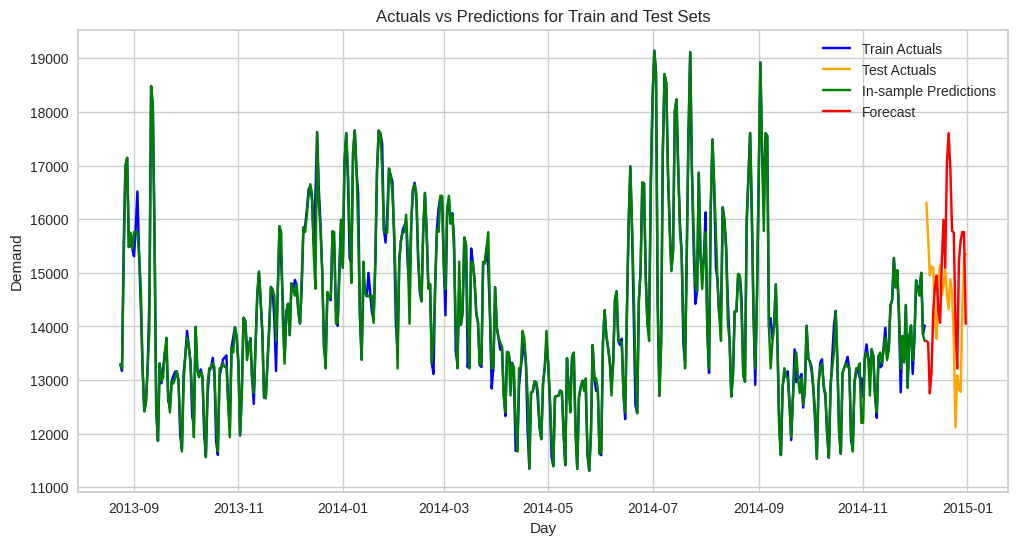

In [53]:
plt.figure(figsize=(12, 6))

# Convert Period index to datetime
train_datetime_index = train.index.to_timestamp()

plt.plot(train_datetime_index[Tx:], train['demand'][Tx:], label='Train Actuals', color='blue')
plt.plot(test.index, test['demand'], label='Test Actuals', color='orange')
plt.plot(train_datetime_index[Tx:], train_predictions, label='In-sample Predictions', color='green')
plt.plot(test.index, future_forecast, label='Forecast', color='red')

plt.title('Actuals vs Predictions for Train and Test Sets')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.legend()
plt.show()

### Random Forest

In [54]:
rf_model = RandomForestRegressor(max_depth=10)
rf_model.fit(Xtrain, Ytrain)

RandomForestRegressor(max_depth=10)

In [55]:
# Predict on the training set
train_pred_diff = rf_model.predict(Xtrain)
last_train_demand_value = data['demand'].iloc[data.index.get_loc(train.index[0])]
train_pred_level = [last_train_demand_value + np.sum(train_pred_diff[:i+1]) for i in range(len(train_pred_diff))]

In [56]:
# Make predictions on the training set
train_predictions = rf_model.predict(Xtrain)

# Calculate the MAPE
mae_train = mean_absolute_error(Ytrain, train_predictions)
print(f'MAE on the training set: ',mae_train)

MAE on the training set:  276.443460742545


In [57]:
def forecast_future(dt_model, X_last, n_steps):
    future_forecast = []
    current_step = X_last[-1].tolist()

    for _ in range(n_steps):
        next_step_pred = rf_model.predict(np.array([current_step]))[0]
        future_forecast.append(next_step_pred)
        current_step = current_step[1:] + [next_step_pred]

    return future_forecast

# The last known input before the test set
X_last = Xtrain[-1:]

# Generating future forecasts for the test set
future_forecast = forecast_future(rf_model, X_last, test_period)

# Calculate MAPE on the test set
mae_test = mean_absolute_error(Ytest, future_forecast)
print(f'MAE on the test set: ',mae_test)

MAE on the test set:  1167.0772908330048


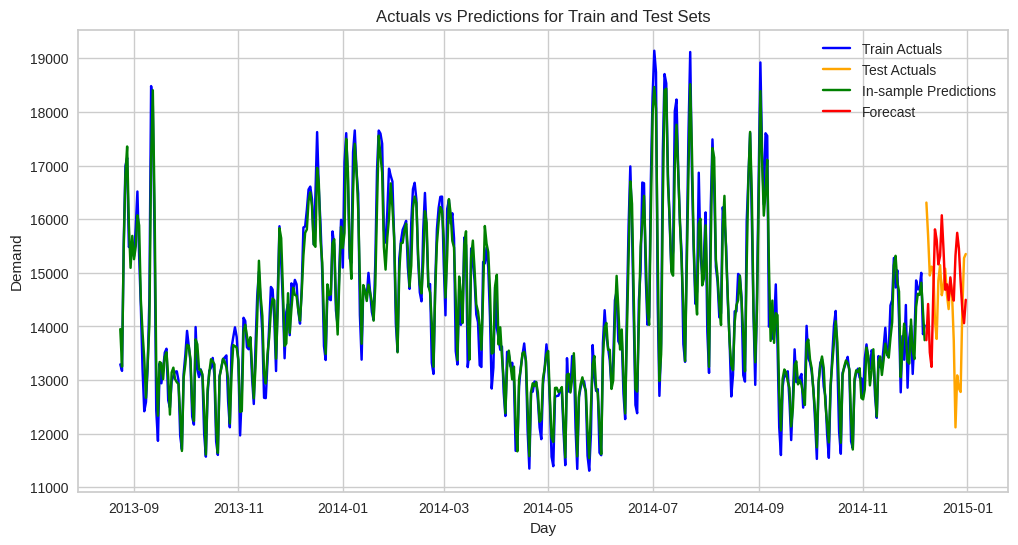

In [58]:
plt.figure(figsize=(12, 6))

# Convert Period index to datetime
train_datetime_index = train.index.to_timestamp()

plt.plot(train_datetime_index[Tx:], train['demand'][Tx:], label='Train Actuals', color='blue')
plt.plot(test.index, test['demand'], label='Test Actuals', color='orange')
plt.plot(train_datetime_index[Tx:], train_predictions, label='In-sample Predictions', color='green')
plt.plot(test.index, future_forecast, label='Forecast', color='red')

plt.title('Actuals vs Predictions for Train and Test Sets')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.legend()
plt.show()


## Deep Learning

In [59]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [60]:
data = pd.read_csv("PDB_Load_History.csv", index_col=0)
data.head()

,demand
data,
8/18/2013,13326.50000
8/19/2013,15461.25000
8/20/2013,16720.20833
8/21/2013,17532.33333
8/22/2013,17459.91667


In [61]:
pd.to_datetime(data.index)

DatetimeIndex(['2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
               '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
               '2013-08-26', '2013-08-27',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='data', length=501, freq=None)

In [62]:
data.index = pd.to_datetime(data.index).to_period('D')
data.index

PeriodIndex(['2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
             '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
             '2013-08-26', '2013-08-27',
             ...
             '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
             '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
             '2014-12-30', '2014-12-31'],
            dtype='period[D]', name='data', length=501)

In [63]:
data = data[['demand']]

In [64]:
idx = pd.period_range(min(data.index), max(data.index))
data = data.reindex(idx, fill_value=np.nan)
data = data.fillna(method = 'ffill')
data.tail(10)

,demand
2014-12-22,14883.20833
2014-12-23,14604.16667
2014-12-24,13732.08333
2014-12-25,12118.66667
2014-12-26,13088.41667
2014-12-27,12843.75000
2014-12-28,12779.20833
2014-12-29,14332.29167
2014-12-30,15276.04167
2014-12-31,15352.12500


Text(0.5, 1.0, 'Demand Time Series')

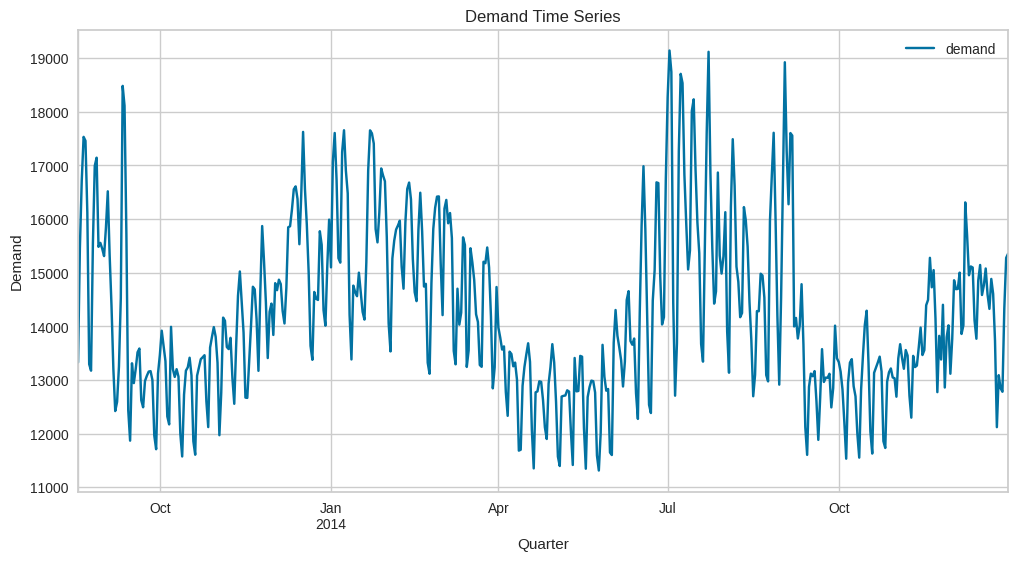

In [65]:
import matplotlib.pyplot as plt

data.plot(figsize=(12,6))
plt.xlabel('Quarter')
plt.ylabel('Demand')
plt.title('Demand Time Series')

In [66]:
data['LogReturn'] = np.log(data['demand']).diff()
data.head()

,demand,LogReturn
2013-08-18,13326.50000,NaN
2013-08-19,15461.25000,0.148582
2013-08-20,16720.20833,0.078281
2013-08-21,17532.33333,0.047429
2013-08-22,17459.91667,-0.004139


In [67]:
data = data.dropna()

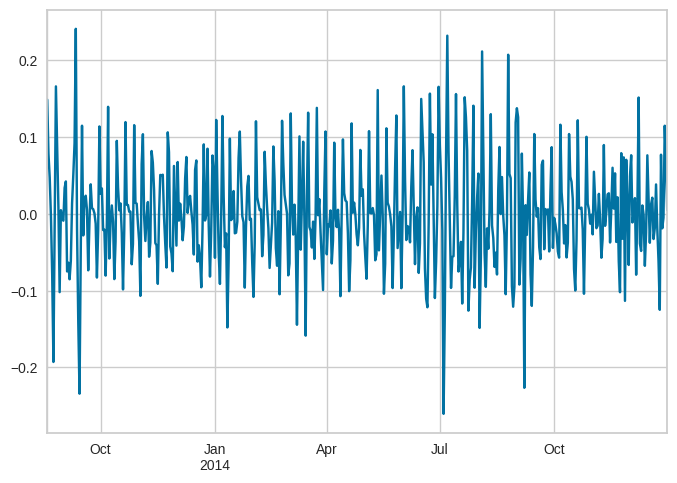

In [68]:
data['LogReturn'].plot()
plt.show()

In [69]:
len(data)

500

In [70]:
num_train_samples = int(0.5 * len(data))
num_val_samples = int(0.15 * len(data))
num_test_samples = len(data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 250
num_val_samples: 75
num_test_samples: 175


In [71]:
import numpy as np
from tensorflow import keras

int_sequence = np.arange(13)
batch_size = 3 # Number of timeseries samples in each batch (except maybe the last one). If None, the data will not be batched (the dataset will yield individual samples).
sequence_length = 5 # Length of the output sequences (in number of timesteps).
h = 1 # number of h steps ahead for forecasting
delay = sequence_length + h -1  # number of delayed timesteps to start predictions

dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-delay],
    targets=int_sequence[delay:],
    sequence_length=sequence_length,
    sequence_stride= 1, # Number of timesteps between two consecutive output sequences.
    batch_size=batch_size,
    shuffle = True, # Whether to shuffle output samples, or instead draw them in chronological order.
)

for inputs, targets in dummy_dataset:
  print(inputs, targets)

tf.Tensor(
[[0 1 2 3 4]
 [2 3 4 5 6]
 [3 4 5 6 7]], shape=(3, 5), dtype=int64) tf.Tensor([5 7 8], shape=(3,), dtype=int64)
tf.Tensor([[1 2 3 4 5]], shape=(1, 5), dtype=int64) tf.Tensor([6], shape=(1,), dtype=int64)


In [72]:
series = data['LogReturn'].dropna().to_numpy()
sequence_length = 60 # using the past 60 days to predict next day.
h = 1
delay = sequence_length  + h - 1
batch_size = 32

train_dataset = keras.utils.timeseries_dataset_from_array(
    data = series[:-delay],
    targets=series[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    data = series[:-delay],
    targets=series[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    data = series[:-delay],
    targets=series[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

### Naive

In [73]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

In [74]:
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.3f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.3f}")

# the unit is DiffLogAAPL

Validation MAE: 0.113
Test MAE: 0.059


### RNN

In [75]:
from tensorflow.keras import layers, models, callbacks

In [76]:
# Set the number of features to 1
n_features = 1

In [77]:
# Define the model
inputs = keras.Input(shape=(sequence_length, n_features))
x = layers.SimpleRNN(64)(inputs)  # Use 64 recurrent cells
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
callbacks = [
    keras.callbacks.ModelCheckpoint("RNN.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
6/6 [==============================] - 2s 80ms/step - loss: 0.0173 - mae: 0.0992 - val_loss: 0.0119 - val_mae: 0.0809
Epoch 2/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0032 - mae: 0.0455 - val_loss: 0.0108 - val_mae: 0.0753
Epoch 3/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0099 - val_mae: 0.0752
Epoch 4/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0022 - mae: 0.0366 - val_loss: 0.0093 - val_mae: 0.0736
Epoch 5/10
6/6 [==============================] - 0s 47ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0089 - val_mae: 0.0758
Epoch 6/10
6/6 [==============================] - 0s 47ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0083 - val_mae: 0.0718
Epoch 7/10
6/6 [==============================] - 0s 53ms/step - loss: 0.0017 - mae: 0.0325 - val_loss: 0.0079 - val_mae: 0.0709
Epoch 8/10
6/6 [==============================] - 0s 49ms/step - loss: 0.0016 - mae: 0.0316 - val

In [79]:
model = keras.models.load_model("RNN.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.5f}")

2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - mae: 0.0357
Test MAE: 0.03565


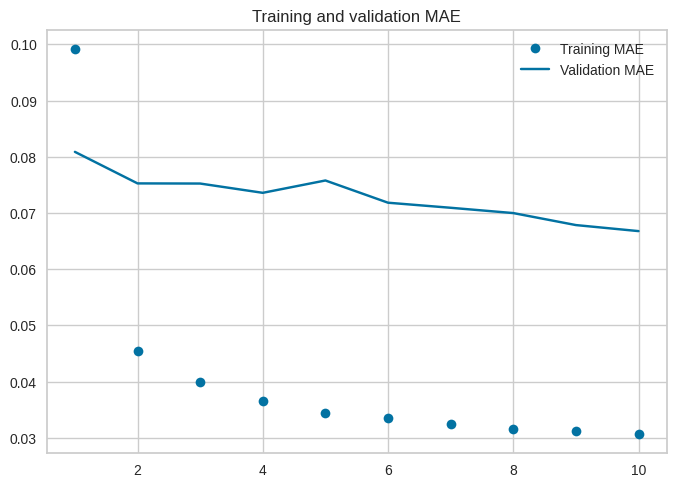

In [80]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### LSTM

In [81]:
inputs = keras.Input(shape=(sequence_length, n_features))
x = layers.LSTM(64)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
callbacks = [
    keras.callbacks.ModelCheckpoint("LSTM.keras",
                                    save_best_only=True)
]
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
6/6 [==============================] - 3s 136ms/step - loss: 0.0034 - mae: 0.0456 - val_loss: 0.0133 - val_mae: 0.0924
Epoch 2/10
6/6 [==============================] - 0s 48ms/step - loss: 0.0034 - mae: 0.0457 - val_loss: 0.0125 - val_mae: 0.0887
Epoch 3/10
6/6 [==============================] - 0s 42ms/step - loss: 0.0032 - mae: 0.0443 - val_loss: 0.0121 - val_mae: 0.0900
Epoch 4/10
6/6 [==============================] - 0s 45ms/step - loss: 0.0032 - mae: 0.0445 - val_loss: 0.0113 - val_mae: 0.0863
Epoch 5/10
6/6 [==============================] - 0s 45ms/step - loss: 0.0031 - mae: 0.0435 - val_loss: 0.0110 - val_mae: 0.0871
Epoch 6/10
6/6 [==============================] - 0s 45ms/step - loss: 0.0031 - mae: 0.0438 - val_loss: 0.0103 - val_mae: 0.0839
Epoch 7/10
6/6 [==============================] - 0s 43ms/step - loss: 0.0030 - mae: 0.0432 - val_loss: 0.0101 - val_mae: 0.0838
Epoch 8/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0030 - mae: 0.0433 - va

In [83]:
model = keras.models.load_model("LSTM.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.5f}")

2/2 [==============================] - 1s 14ms/step - loss: 0.0027 - mae: 0.0396
Test MAE: 0.03958


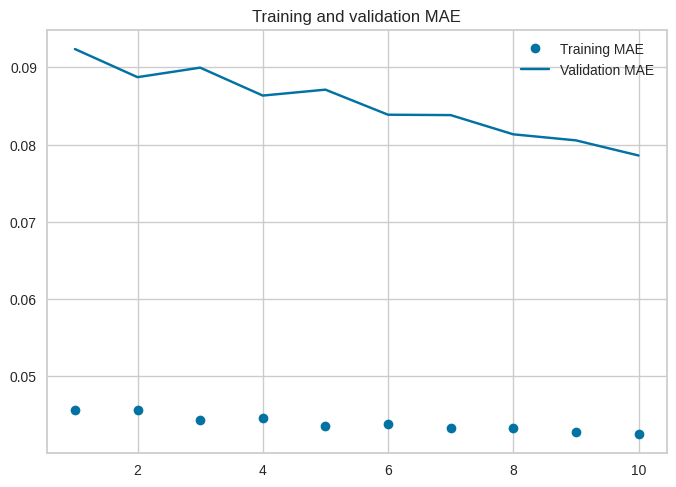

In [84]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Stacked RNN

In [85]:
inputs = keras.Input(shape=(sequence_length, n_features))
x = layers.LSTM(128, recurrent_dropout=0.1, return_sequences=True)(inputs)
x = layers.SimpleRNN(128, recurrent_dropout=0.1)(x)
x = layers.Dropout(0.1)(x)

outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("Stacked_regularized.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
6/6 [==============================] - 5s 241ms/step - loss: 0.1135 - mae: 0.2579 - val_loss: 0.0305 - val_mae: 0.1438
Epoch 2/10
6/6 [==============================] - 1s 158ms/step - loss: 0.0908 - mae: 0.2411 - val_loss: 0.0136 - val_mae: 0.0910
Epoch 3/10
6/6 [==============================] - 1s 148ms/step - loss: 0.0455 - mae: 0.1653 - val_loss: 0.0140 - val_mae: 0.0931
Epoch 4/10
6/6 [==============================] - 1s 159ms/step - loss: 0.0243 - mae: 0.1248 - val_loss: 0.0132 - val_mae: 0.0893
Epoch 5/10
6/6 [==============================] - 1s 161ms/step - loss: 0.0101 - mae: 0.0806 - val_loss: 0.0130 - val_mae: 0.0884
Epoch 6/10
6/6 [==============================] - 1s 159ms/step - loss: 0.0061 - mae: 0.0638 - val_loss: 0.0129 - val_mae: 0.0886
Epoch 7/10
6/6 [==============================] - 1s 168ms/step - loss: 0.0051 - mae: 0.0582 - val_loss: 0.0126 - val_mae: 0.0880
Epoch 8/10
6/6 [==============================] - 1s 162ms/step - loss: 0.0055 - mae: 0.05

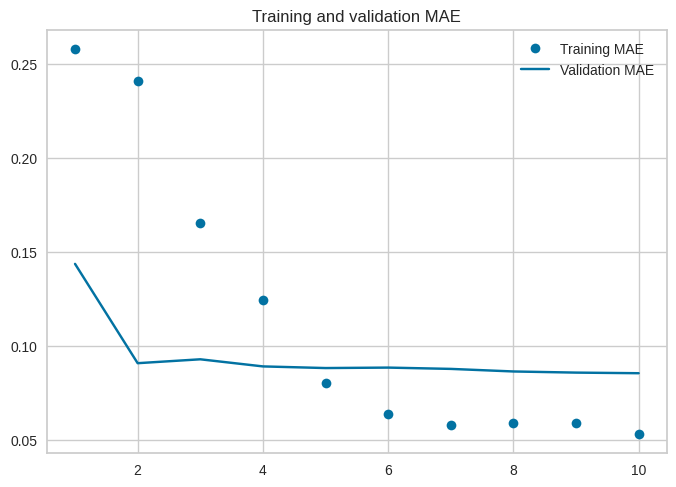

In [86]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [87]:
model = keras.models.load_model("Stacked_regularized.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.5f}")

2/2 [==============================] - 1s 24ms/step - loss: 0.0026 - mae: 0.0397
Test MAE: 0.03968


# Overall Model Comparison

In [93]:
models = ["Auto ARIMA", "Seasonal Naive Forecaster", "Naive Forecaster",
          "Exponential Smoothing", "Exponential Smoothing", "ARIMA",
          "Decision Tree", "Random Forest", "RNN", "LSTM", "Stacked RNN"]

mae_values = [685.9667, 751.6042, 937.9601, 938.3498, 1125.0509	,
              2592.1015,1514.1512, 1167.0772, 0.03565, 0.03958, 0.03968]

# Create the DataFrame
df = pd.DataFrame({
    'Model': models,
    'MAE': mae_values
})

# Print the DataFrame to display it
print(df)

                        Model         MAE
0                  Auto ARIMA   685.96670
1   Seasonal Naive Forecaster   751.60420
2            Naive Forecaster   937.96010
3       Exponential Smoothing   938.34980
4       Exponential Smoothing  1125.05090
5                       ARIMA  2592.10150
6               Decision Tree  1514.15120
7               Random Forest  1167.07720
8                         RNN     0.03565
9                        LSTM     0.03958
10                Stacked RNN     0.03968
